In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
news_dataset = pd.read_csv('COVID Fake News Data.csv')

In [3]:
fake_count = news_dataset[news_dataset['outcome'] == 0].shape[0]
real_count = news_dataset[news_dataset['outcome'] == 1].shape[0]

# Print the counts
print("Fake news count:", fake_count)
print("Real news count:", real_count)

Fake news count: 9727
Real news count: 474


In [4]:
news_dataset.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [5]:
news_dataset.isnull().sum()

headlines    0
outcome      0
dtype: int64

In [6]:
news_dataset.shape

(10201, 2)

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
news_dataset['content'] = news_dataset['headlines']

In [9]:
print(news_dataset['content'])

0        A post claims compulsory vacination violates t...
1        A photo claims that this person is a doctor wh...
2        Post about a video claims that it is a protest...
3        All deaths by respiratory failure and pneumoni...
4        The dean of the College of Biologists of Euska...
                               ...                        
10196    A Chinese market caused the new coronavirus (v...
10197    The peak of the new coronavirus will happen in...
10198    Stores and supermarkets in Veracruz (Mexico) w...
10199    A chain message circulated on Tuesday, Jan. 14...
10200    Photo shows Muslims in Tamil Nadu state of Ind...
Name: content, Length: 10201, dtype: object


In [10]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [11]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [12]:
print(news_dataset['content'])

0        post claim compulsori vacin violat principl bi...
1        photo claim person doctor die attend mani covi...
2        post video claim protest confin town aranda de...
3        death respiratori failur pneumonia regist covi...
4        dean colleg biologist euskadi state lot pcr fa...
                               ...                        
10196              chines market caus new coronaviru video
10197    peak new coronaviru happen two week jan two we...
10198    store supermarket veracruz mexico close due ne...
10199    chain messag circul tuesday jan warn peopl avo...
10200    photo show muslim tamil nadu state india float...
Name: content, Length: 10201, dtype: object


In [13]:
X = news_dataset['content'].values
Y = news_dataset['outcome'].values

In [14]:
corpus=X
print(X)
print(corpus)

['post claim compulsori vacin violat principl bioethic coronaviru exist pcr test return mani fals posit influenza vaccin relat covid'
 'photo claim person doctor die attend mani covid patin hospit mu iz bueno air'
 'post video claim protest confin town aranda de duero burgo' ...
 'store supermarket veracruz mexico close due new coronaviru local govern ask peopl buy suppli'
 'chain messag circul tuesday jan warn peopl avoid go shangri la plaza mall mandaluyong citi suppos case sever acut respiratori syndrom sar report one mall medic clinic'
 'photo show muslim tamil nadu state india float lockdown rule ramzan offer night prayer']
['post claim compulsori vacin violat principl bioethic coronaviru exist pcr test return mani fals posit influenza vaccin relat covid'
 'photo claim person doctor die attend mani covid patin hospit mu iz bueno air'
 'post video claim protest confin town aranda de duero burgo' ...
 'store supermarket veracruz mexico close due new coronaviru local govern ask peopl

In [15]:
print(Y)

[0 0 0 ... 0 0 0]


In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [17]:
print(X)

  (0, 7796)	0.21459958574036272
  (0, 7690)	0.3492092506388485
  (0, 7689)	0.1444923487680468
  (0, 7279)	0.154663444894284
  (0, 6166)	0.24768946972049075
  (0, 6069)	0.22063218445681515
  (0, 5707)	0.3238293054092591
  (0, 5614)	0.14525160449676916
  (0, 5611)	0.18040592299755906
  (0, 5388)	0.25672838011786553
  (0, 4386)	0.2292148884521789
  (0, 3560)	0.2708496128295223
  (0, 2580)	0.20453240280785132
  (0, 2503)	0.23861481942655385
  (0, 1746)	0.07843353407738198
  (0, 1681)	0.07347680132345842
  (0, 1566)	0.283603043950003
  (0, 1438)	0.11897603272487937
  (0, 843)	0.3492092506388485
  (1, 5473)	0.18609639918266646
  (1, 5439)	0.23386796212815644
  (1, 5366)	0.41471096474968455
  (1, 4784)	0.3669394018041946
  (1, 4386)	0.27220907622319307
  (1, 3705)	0.37486739042815337
  :	:
  (10199, 4365)	0.39537465419917117
  (10199, 4007)	0.19158987722702153
  (10199, 3736)	0.1963541244211072
  (10199, 2990)	0.14019136786056338
  (10199, 1465)	0.19386829924641344
  (10199, 1427)	0.136751660

In [18]:
vec = CountVectorizer()
vec.fit(corpus)

X1 = vec.transform(corpus)

In [19]:
print(X1)

  (0, 843)	1
  (0, 1438)	1
  (0, 1566)	1
  (0, 1681)	1
  (0, 1746)	1
  (0, 2503)	1
  (0, 2580)	1
  (0, 3560)	1
  (0, 4386)	1
  (0, 5388)	1
  (0, 5611)	1
  (0, 5614)	1
  (0, 5707)	1
  (0, 6069)	1
  (0, 6166)	1
  (0, 7279)	1
  (0, 7689)	1
  (0, 7690)	1
  (0, 7796)	1
  (1, 176)	1
  (1, 536)	1
  (1, 1053)	1
  (1, 1438)	1
  (1, 1746)	1
  (1, 2049)	1
  :	:
  (10199, 5417)	1
  (10199, 5540)	1
  (10199, 6111)	1
  (10199, 6143)	1
  (10199, 6424)	1
  (10199, 6576)	1
  (10199, 6602)	1
  (10199, 7094)	1
  (10199, 7152)	1
  (10199, 7519)	1
  (10199, 7878)	1
  (10200, 2729)	1
  (10200, 3524)	1
  (10200, 4215)	1
  (10200, 4823)	1
  (10200, 4850)	1
  (10200, 4994)	1
  (10200, 5119)	1
  (10200, 5473)	1
  (10200, 5651)	1
  (10200, 5935)	1
  (10200, 6314)	1
  (10200, 6656)	1
  (10200, 6933)	1
  (10200, 7188)	1


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=0)

In [21]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.33, stratify=Y, random_state=0)

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train, Y_train)

LogisticRegression()

In [47]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9604989604989606


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)
print('precision =',precision)
print('recall=',recall)
print('f1-score=',f1)

precision = 1.0
recall= 0.14743589743589744
f1-score= 0.2569832402234637


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, X_test_prediction)

array([[3211,    0],
       [ 133,   23]], dtype=int64)

In [26]:
model.fit(X1_train, Y_train)

LogisticRegression()

In [27]:
X1_test_prediction = model.predict(X1_test)
test_data_accuracy = accuracy_score(X1_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9673299673299673


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, X1_test_prediction)

array([[3204,    7],
       [ 103,   53]], dtype=int64)

In [83]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(C=0.1)
linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(Y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9715


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3199,   12],
       [  84,   72]], dtype=int64)

In [85]:
linear_clf.fit(X1_train, Y_train)
pred = linear_clf.predict(X1_test)
score = accuracy_score(Y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9658


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3176,   35],
       [  80,   76]], dtype=int64)

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9536679536679536


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3211,    0],
       [ 156,    0]], dtype=int64)

In [35]:
classifier.fit(X1_train, Y_train)
pred = classifier.predict(X1_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9599049599049599


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3183,   28],
       [ 107,   49]], dtype=int64)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9676269676269676


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3205,    6],
       [ 103,   53]], dtype=int64)

In [111]:
knn.fit(X1_train, Y_train)
y_pred = knn.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9575289575289575


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3210,    1],
       [ 142,   14]], dtype=int64)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=(5))
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.967032967032967


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3208,    3],
       [ 108,   48]], dtype=int64)

In [24]:
dt1=DecisionTreeClassifier(max_depth=(9))
dt1.fit(X1_train,Y_train)
y_pred = dt1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9664389664389664


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3207,    4],
       [ 109,   47]], dtype=int64)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9708939708939709


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3211,    0],
       [  98,   58]], dtype=int64)

In [75]:
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X1_train,Y_train)
y_pred=clf1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9702999702999703


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3208,    3],
       [  97,   59]], dtype=int64)

In [137]:
from sklearn import svm
clf = svm.SVC(kernel='linear',gamma='auto',C=3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9711909711909712


In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3200,   11],
       [  86,   70]], dtype=int64)

In [144]:
from sklearn import svm
clf1 = svm.SVC(kernel='linear',gamma='auto')
clf1.fit(X1_train, Y_train)
y_pred = clf1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9673299673299673


In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3185,   26],
       [  84,   72]], dtype=int64)

In [110]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
y_pred=abc.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9640629640629641


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3196,   15],
       [ 106,   50]], dtype=int64)

In [112]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X1_train,Y_train)
y_pred=abc.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9622809622809623


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3191,   20],
       [ 107,   49]], dtype=int64)

In [121]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9723789723789724

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3198,   13],
       [  80,   76]], dtype=int64)

In [116]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X1_train, Y_train)
y_pred = model.predict(X1_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.972972972972973

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3200,   11],
       [  80,   76]], dtype=int64)

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9649539649539649


In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3197,   14],
       [ 104,   52]], dtype=int64)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(X1_train,Y_train)
y_pred=gbc.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.967032967032967


In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3204,    7],
       [ 104,   52]], dtype=int64)

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9697059697059697

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3204,    7],
       [  95,   61]], dtype=int64)

In [127]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1_train, Y_train)
y_pred = model.predict(X1_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9667359667359667

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3203,    8],
       [ 104,   52]], dtype=int64)

In [129]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('mn', MultinomialNB()),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [130]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('mn', MultinomialNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [131]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.97000297000297

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3203,    8],
       [  93,   63]], dtype=int64)

In [133]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('mn', MultinomialNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [134]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9711909711909712

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  88,   68]], dtype=int64)

In [164]:
estimators = [
    ('pac', PassiveAggressiveClassifier()),
    ('gb', GradientBoostingClassifier(random_state=10)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=MLPClassifier(),
    cv=10
)

In [165]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('pac', PassiveAggressiveClassifier()),
                               ('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=MLPClassifier())

In [166]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  86,   70]], dtype=int64)

In [168]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('pac', PassiveAggressiveClassifier()),
                               ('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=MLPClassifier())

In [169]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9726759726759727

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3205,    6],
       [  86,   70]], dtype=int64)

In [187]:
estimators = [
    ('pac', PassiveAggressiveClassifier()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=MLPClassifier(),
    cv=10
)

In [188]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('pac', PassiveAggressiveClassifier()),
                               ('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=MLPClassifier())

In [189]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.972972972972973

In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3204,    7],
       [  84,   72]], dtype=int64)

In [191]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('pac', PassiveAggressiveClassifier()),
                               ('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=MLPClassifier())

In [192]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9694089694089694

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3196,   15],
       [  88,   68]], dtype=int64)

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
bag_model = BaggingClassifier(
    base_estimator=PassiveAggressiveClassifier(), 
    n_estimators=50, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=PassiveAggressiveClassifier(), max_samples=0.8,
                  n_estimators=50, oob_score=True, random_state=0)

In [29]:
pred = bag_model.predict(X_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9717849717849718


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3207,    4],
       [  91,   65]], dtype=int64)

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=PassiveAggressiveClassifier(), 
    n_estimators=50, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X1_train, Y_train)

BaggingClassifier(base_estimator=PassiveAggressiveClassifier(), max_samples=0.8,
                  n_estimators=50, oob_score=True, random_state=0)

In [32]:
pred = bag_model.predict(X1_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9708939708939709


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3202,    9],
       [  89,   67]], dtype=int64)

In [57]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('pac', PassiveAggressiveClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', LogisticRegression())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=MLPClassifier(),
    cv=10
)

In [58]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('svm', LogisticRegression())],
                   final_estimator=MLPClassifier())

In [59]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.972972972972973

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3206,    5],
       [  86,   70]], dtype=int64)

In [61]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('svm', LogisticRegression())],
                   final_estimator=MLPClassifier())

In [62]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  86,   70]], dtype=int64)

In [64]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9688149688149689

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3211,    0],
       [ 105,   51]], dtype=int64)

In [66]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9705969705969706

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3210,    1],
       [  98,   58]], dtype=int64)

In [68]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X1_train,Y_train)
model.score(X1_test,Y_test)

0.9702999702999703

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3210,    1],
       [  98,   58]], dtype=int64)

In [70]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X1_train,Y_train)
model.score(X1_test,Y_test)

0.9708939708939709

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3210,    1],
       [  98,   58]], dtype=int64)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
#clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('dt',clf111 ),('mnb',clf333),('gb',clf777)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9732699732699732

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3210,    1],
       [  89,   67]], dtype=int64)

In [26]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
#clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('dt',clf111), ('mnb', clf333),('gb',clf777)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.972972972972973

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3209,    2],
       [  89,   67]], dtype=int64)

In [28]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
#clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('knn',clf111),('rf',clf333),('mlp',clf777)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
model.score(X1_test,Y_test)

0.9708939708939709

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3209,    2],
       [  94,   62]], dtype=int64)

In [29]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
#clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('knn',clf111),('rf',clf333),('mlp',clf777)], voting='soft')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
model.score(X1_test,Y_test)

0.9714879714879715

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3206,    5],
       [  91,   65]], dtype=int64)

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
#clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf333 ),('mnb',clf777),('gb',clf111)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9694089694089694

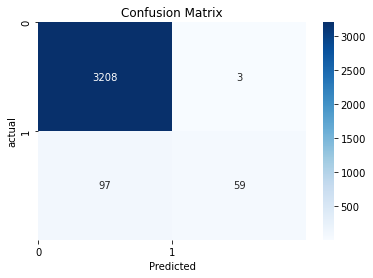

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['0', '1']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Display the plot
plt.show()

In [39]:
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
#clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf111), ('mnb', clf333),('gb',clf666)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

In [36]:
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
#clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf777 ),('mnb',clf333),('gb',clf111)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9682209682209683

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3207,    4],
       [  95,   61]], dtype=int64)

In [43]:
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
#clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf111), ('mnb', clf333),('gb',clf777)], voting='soft')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9694089694089694

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3209,    2],
       [ 101,   55]], dtype=int64)

In [50]:
estimators = [
    ('gb', GradientBoostingClassifier(random_state=10)),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [51]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [52]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  86,   70]], dtype=int64)

In [54]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [55]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9708939708939709

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  89,   67]], dtype=int64)

In [57]:
estimators = [
    ('gb', GradientBoostingClassifier(random_state=10)),
    ('mlp', MLPClassifier()),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [58]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('mlp', MLPClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [59]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.972972972972973

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3206,    5],
       [  86,   70]], dtype=int64)

In [61]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('mlp', MLPClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [62]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.972972972972973

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3206,    5],
       [  86,   70]], dtype=int64)

In [64]:
estimators = [
    ('mnb', MultinomialNB()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [65]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('mnb', MultinomialNB()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [66]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3202,    9],
       [  86,   70]], dtype=int64)

In [68]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('mnb', MultinomialNB()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [69]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3204,    7],
       [  88,   68]], dtype=int64)

In [71]:
estimators = [
    ('lr', LogisticRegression()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('mlp', MLPClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=RandomForestClassifier(),
    cv=10
)

In [72]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('mlp', MLPClassifier())],
                   final_estimator=RandomForestClassifier())

In [73]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3199,   12],
       [  83,   73]], dtype=int64)

In [75]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('mlp', MLPClassifier())],
                   final_estimator=RandomForestClassifier())

In [76]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9717849717849718

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3196,   15],
       [  80,   76]], dtype=int64)

In [78]:
estimators = [
    ('xgb', XGBClassifier()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('mlp', MLPClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=RandomForestClassifier(),
    cv=10
)

In [79]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [80]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9711909711909712

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3199,   12],
       [  85,   71]], dtype=int64)

In [82]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [83]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9705969705969706

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3200,   11],
       [  88,   68]], dtype=int64)